<a href="https://colab.research.google.com/github/richardsoesantoe/tugas4_data_analytic/blob/main/latihan_tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


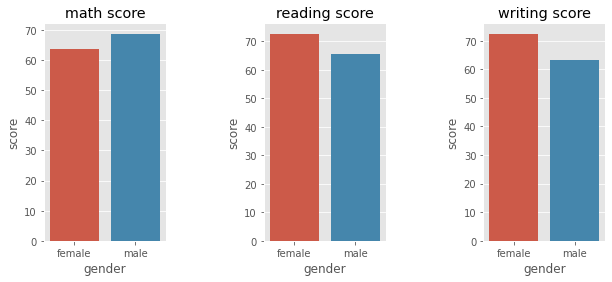

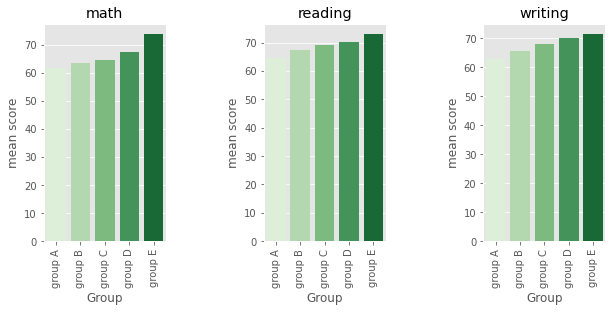

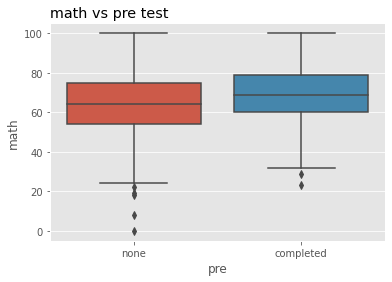

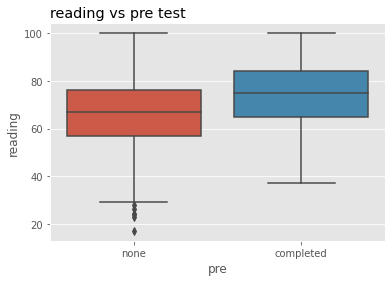

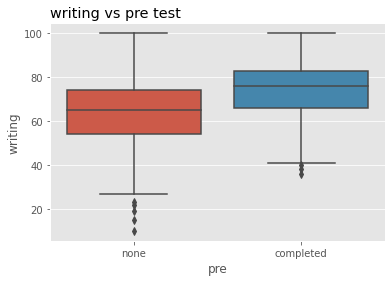

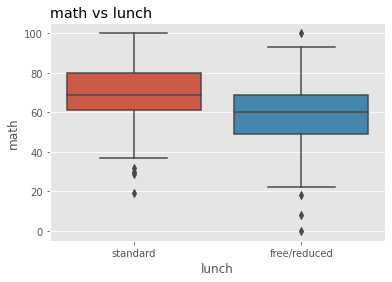

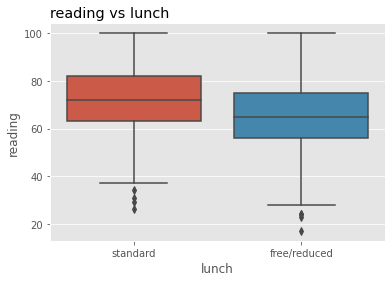

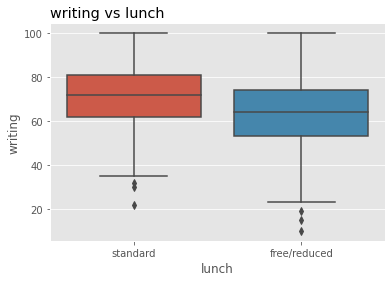

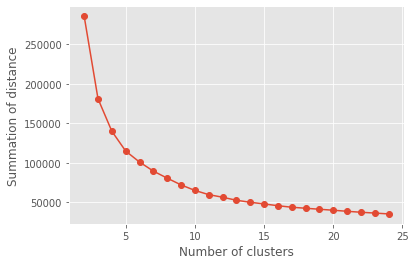

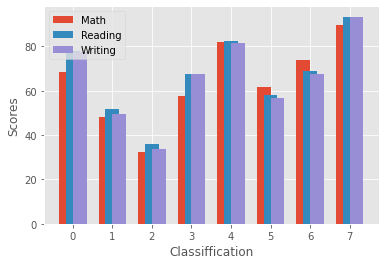

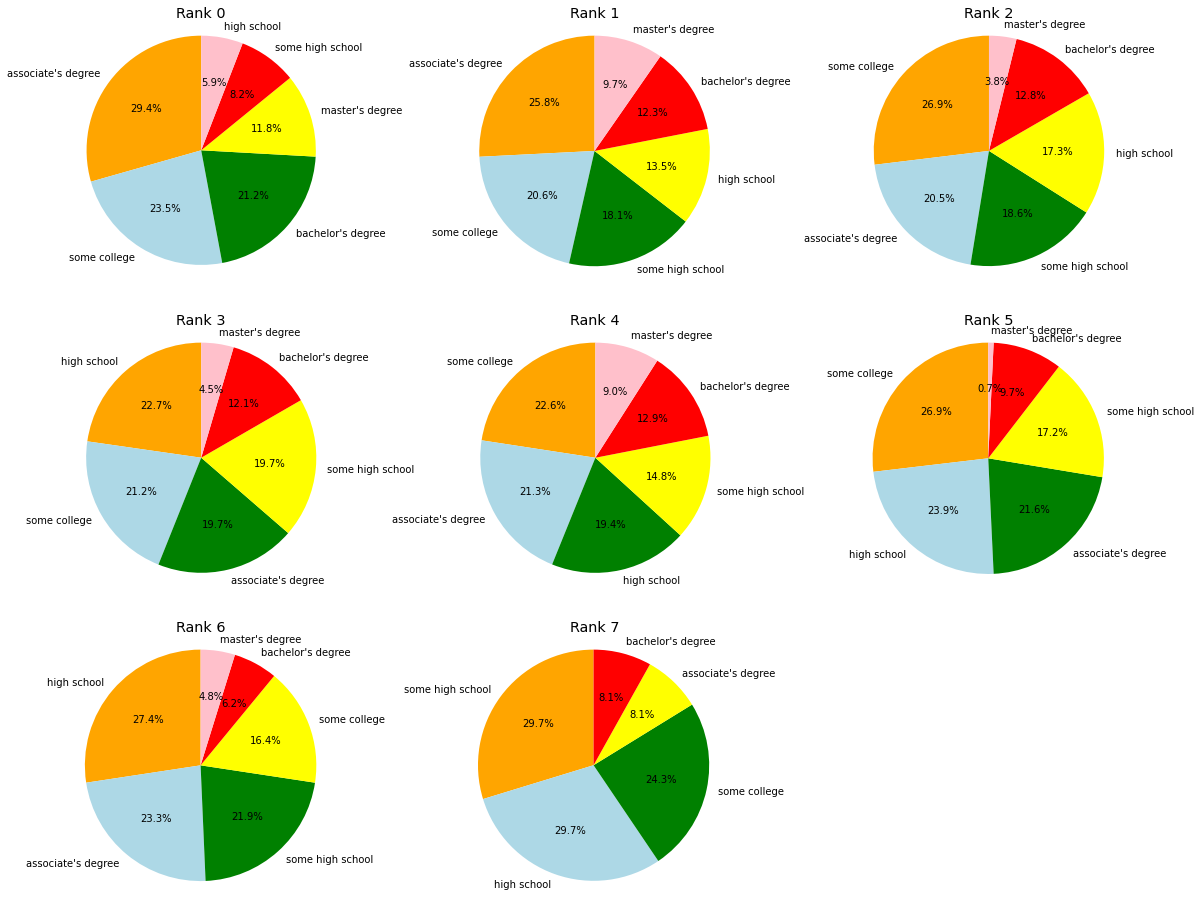

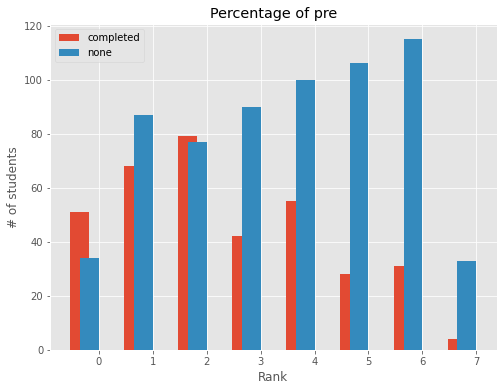

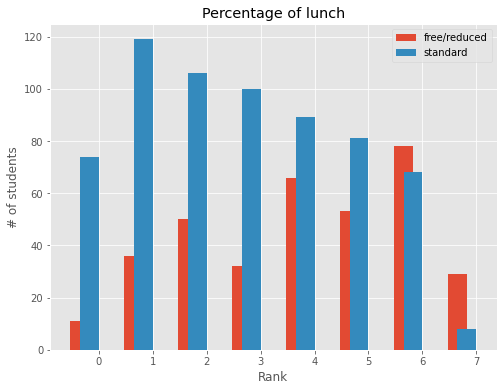

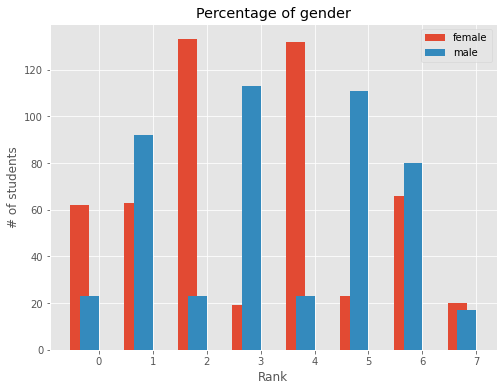

In [45]:
# Richard Susanto - 20101053 - Data Analytics
# Kasus yang saya gunakan adalah student performance

import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


# mengecek ada berapa data set dalam folder content
os.listdir("../content/")

# memilih dataset pada content
filename = "../content/StudentsPerformance.csv"
score_df = pd.read_csv(filename)
score_df.head()

# code untuk ganti nama kolom menjadi lebih sederhana, karena eberapa nama kolom terlalu panjang

score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

# code untuk cek tipe data
score_df.dtypes

# menampilkan grafik performance dari masing masing bidang berdasarkan gender, dan didapat bahwa laki-laki memiliki performance yang bagus dibidang math, tetapi jelek di bidang membaca dan menulis
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = score_df.groupby("gender")[list(score_df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(score_df.columns[-3:])[idx])
    
plt.show()


# menampilkan grafik performance berdasarkan etnis, dan hasilnya group E mendapatkan hasil yang bagus diberbagai bidang, dan group A terjelek
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = score_df.groupby("ethnicity")[list(score_df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(score_df.columns[-3:])[idx])
plt.show()


# hasil dan skor dan persiapan ujian
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["pre"], y=score_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

#rata-rata dari score terbaik
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["lunch"], y=score_df[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

labelencoder = LabelEncoder()
train_df = score_df.copy()
train_df["parent_education"] = labelencoder.fit_transform(train_df["parent_education"])
train_df["pre"] = labelencoder.fit_transform(train_df["pre"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df.head()

kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
score_df["classification"] = kmeans_label
score_df.head(10)

class_df = score_df.groupby("classification")[score_df.columns[-4:-1]].mean()
class_df

ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

rank

def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")


# untuk melihat rank
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = score_df[score_df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("pre") 

plot_bar_chart("lunch")

plot_bar_chart("gender")